In [3]:
import pandas as pd

# Đọc file CSV trước
df = pd.read_csv('Spacex.csv')

# Kiểm tra nhanh:
print(df.head())
print(df.columns.tolist())


<ipython-input-3-8adf671ca90d>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


         Date Time (UTC) Booster_Version  Launch_Site  \
0  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  PAYLOAD_MASS__KG_  \
0               Dragon Spacecraft Qualification Unit                  0   
1  Dragon demo flight C1, two CubeSats, barrel of...                  0   
2                              Dragon demo flight C2                525   
3                                       SpaceX CRS-1                500   
4                                       SpaceX CRS-2                677   

       Orbit         Customer Mission_Outcome      Landing_Outcome  
0        LEO           SpaceX         Success  Failure (parachute)  
1  LEO (ISS)  NASA (COTS) NRO         Success  Failure (parachute)  

TASK 1: Visualize the relationship between Flight Number and Launch Site

In [7]:
print(df.columns)


Index(['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload',
       'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome',
       'Landing_Outcome'],
      dtype='object')


In [8]:
df['Class'] = df['Landing_Outcome'].apply(lambda x: 1 if 'Success' in str(x) else 0)


In [9]:
print(df[['Landing_Outcome', 'Class']].head())


       Landing_Outcome  Class
0  Failure (parachute)      0
1  Failure (parachute)      0
2           No attempt      0
3           No attempt      0
4           No attempt      0


In [12]:
print(df.columns.tolist())


['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload', 'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome', 'Landing_Outcome', 'Class']


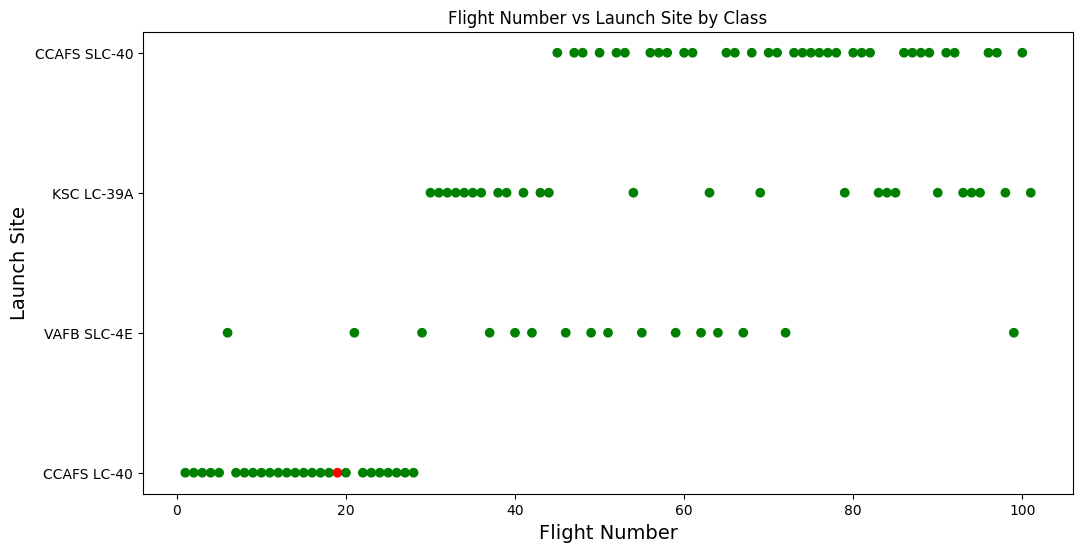

In [13]:
df['FlightNumber'] = range(1, len(df) + 1)

# Tạo cột màu từ Mission_Outcome
df['Class'] = df['Mission_Outcome'].apply(lambda x: 1 if 'Success' in x else 0)

color_map = {1: 'green', 0: 'red'}
colors = df['Class'].map(color_map)

plt.figure(figsize=(12, 6))
plt.scatter(df['FlightNumber'], df['Launch_Site'], c=colors)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site by Class")
plt.show()

TASK 2: Visualize the relationship between Payload Mass and Launch Site

Index(['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload',
       'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome',
       'Landing_Outcome'],
      dtype='object')


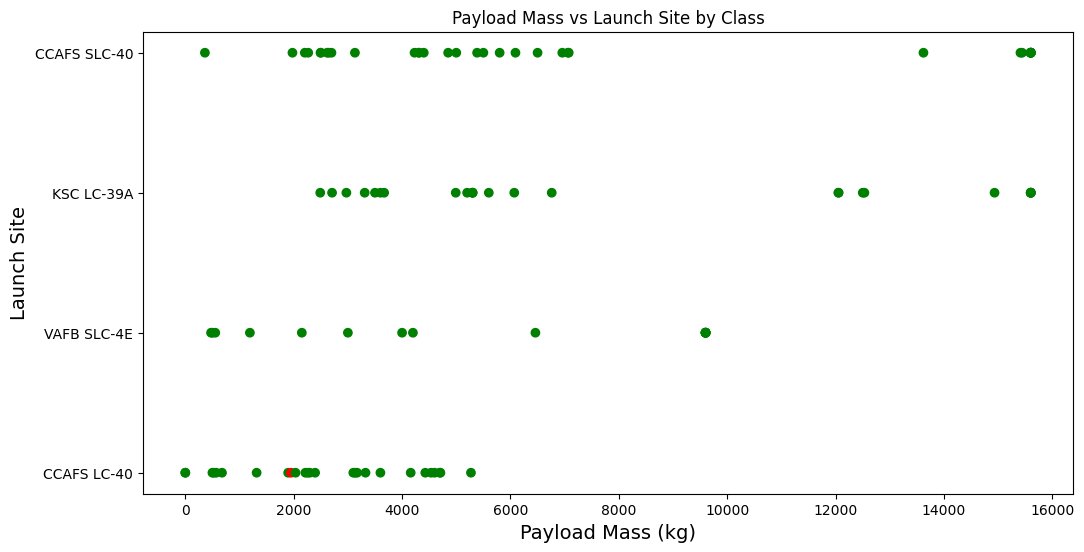

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file spacex.csv
df = pd.read_csv('Spacex.csv')

# Kiểm tra tên cột chính xác để tránh lỗi KeyError
print(df.columns)

# Thêm cột Class nếu chưa có, dựa trên Mission_Outcome
if 'Class' not in df.columns:
    df['Class'] = df['Mission_Outcome'].apply(lambda x: 1 if 'Success' in x else 0)

# Vẽ biểu đồ Payload Mass vs Launch Site với màu dựa trên Class
plt.figure(figsize=(12, 6))
colors = df['Class'].map({1: 'green', 0: 'red'})

plt.scatter(df['PAYLOAD_MASS__KG_'], df['Launch_Site'], c=colors)

plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site by Class")
plt.show()


TASK 3: Visualize the relationship between success rate of each orbit type

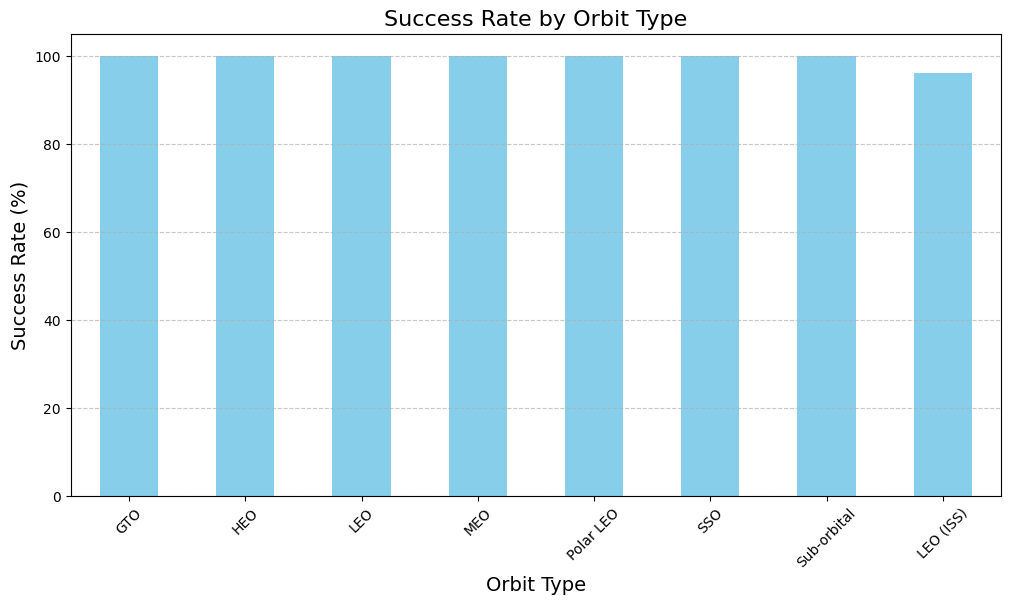

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Bước 1: Đọc file
df = pd.read_csv('Spacex.csv')

# Bước 2: Tạo cột Class nếu chưa có
if 'Class' not in df.columns:
    df['Class'] = df['Mission_Outcome'].apply(lambda x: 1 if 'Success' in x else 0)

# Bước 3: Tính tỷ lệ thành công theo từng loại Orbit
success_rate = df.groupby('Orbit')['Class'].mean() * 100

# Bước 4: Vẽ biểu đồ
plt.figure(figsize=(12, 6))
success_rate.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)
plt.title('Success Rate by Orbit Type', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


TASK 4: Visualize the relationship between FlightNumber and Orbit type

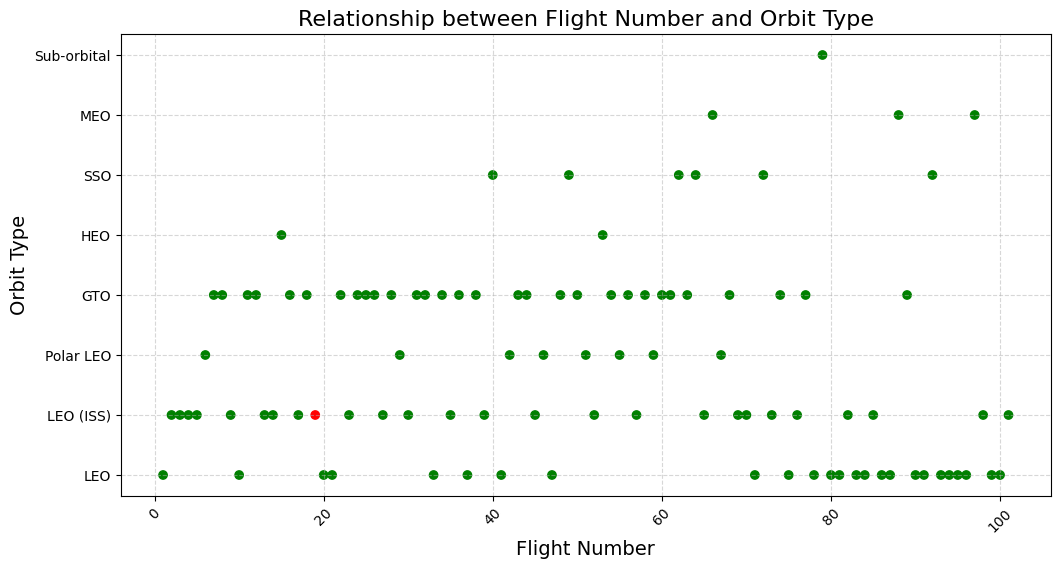

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv('Spacex.csv')

# Đảm bảo cột FlightNumber tồn tại
if 'FlightNumber' not in df.columns:
    df['FlightNumber'] = range(1, len(df) + 1)

# Đảm bảo cột Class tồn tại
if 'Class' not in df.columns:
    df['Class'] = df['Mission_Outcome'].apply(lambda x: 1 if 'Success' in x else 0)

# Ánh xạ màu theo Class
color_map = {1: 'green', 0: 'red'}
colors = df['Class'].map(color_map)

# Vẽ biểu đồ scatter giữa FlightNumber và Orbit
plt.figure(figsize=(12, 6))
plt.scatter(df['FlightNumber'], df['Orbit'], c=colors)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


TASK 5: Visualize the relationship between Payload Mass and Orbit type

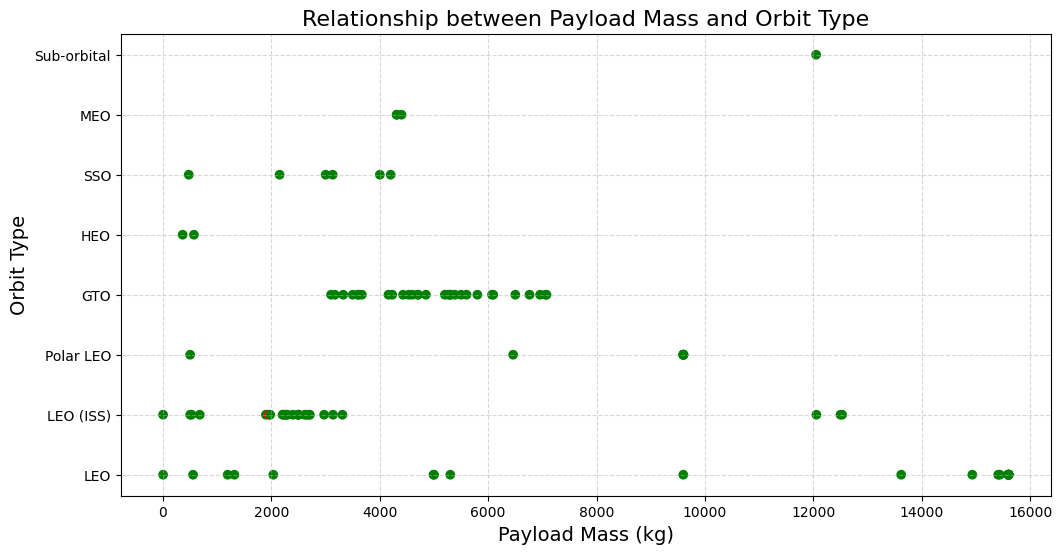

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv('Spacex.csv')

# Nếu chưa có cột Class thì tạo
if 'Class' not in df.columns:
    df['Class'] = df['Mission_Outcome'].apply(lambda x: 1 if 'Success' in x else 0)

# Ánh xạ màu theo Class
color_map = {1: 'green', 0: 'red'}
colors = df['Class'].map(color_map)

# Vẽ biểu đồ scatter giữa Payload Mass và Orbit Type
plt.figure(figsize=(12, 6))
plt.scatter(df['PAYLOAD_MASS__KG_'], df['Orbit'], c=colors)

plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Relationship between Payload Mass and Orbit Type", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


TASK 6: Visualize the launch success yearly trend

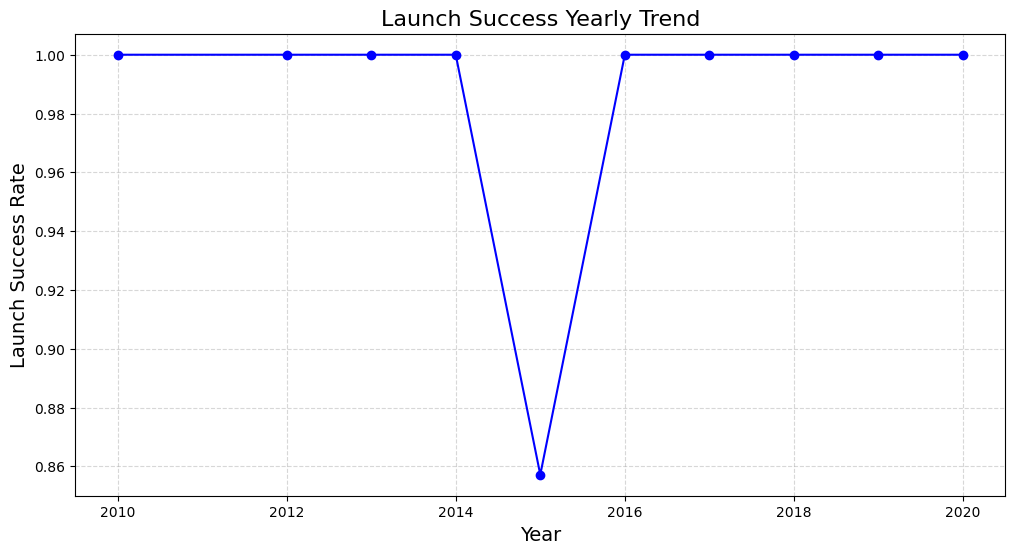

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv('Spacex.csv')

# Chuyển cột Date thành kiểu datetime để dễ xử lý
df['Date'] = pd.to_datetime(df['Date'])

# Thêm cột 'Year' để lấy năm từ cột Date
df['Year'] = df['Date'].dt.year

# Nếu chưa có cột Class, tạo lại từ Mission_Outcome
if 'Class' not in df.columns:
    df['Class'] = df['Mission_Outcome'].apply(lambda x: 1 if 'Success' in x else 0)

# Tính tổng số lần thành công theo từng năm
yearly_success = df.groupby('Year')['Class'].mean()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(yearly_success.index, yearly_success.values, marker='o', linestyle='-', color='b')

plt.xlabel("Year", fontsize=14)
plt.ylabel("Launch Success Rate", fontsize=14)
plt.title("Launch Success Yearly Trend", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


TASK 7: Create dummy variables to categorical columns

In [21]:
import pandas as pd

# Đọc lại file spacex.csv
df = pd.read_csv('Spacex.csv')

# Tạo biến giả bằng get_dummies cho các cột phân loại
categorical_columns = ['Orbit', 'Launch_Site', 'Landing_Outcome', 'Booster_Version']

# Tạo dataframe mới với dummy variables
df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Hiển thị 5 dòng đầu kiểm tra
print(df_dummies.head())

# Lưu lại file nếu cần
df_dummies.to_csv('spacex_with_dummies.csv', index=False)


         Date Time (UTC)                                            Payload  \
0  2010-06-04   18:45:00               Dragon Spacecraft Qualification Unit   
1  2010-12-08   15:43:00  Dragon demo flight C1, two CubeSats, barrel of...   
2  2012-05-22    7:44:00                              Dragon demo flight C2   
3  2012-10-08    0:35:00                                       SpaceX CRS-1   
4  2013-03-01   15:10:00                                       SpaceX CRS-2   

   PAYLOAD_MASS__KG_         Customer Mission_Outcome  Orbit_GTO  Orbit_HEO  \
0                  0           SpaceX         Success      False      False   
1                  0  NASA (COTS) NRO         Success      False      False   
2                525      NASA (COTS)         Success      False      False   
3                500       NASA (CRS)         Success      False      False   
4                677       NASA (CRS)         Success      False      False   

   Orbit_LEO  Orbit_LEO (ISS)  ...  Booster_Versio

TASK 8: Cast all numeric columns to float64

In [24]:
import pandas as pd

# TASK 7: Tạo biến giả cho các cột phân loại
df = pd.read_csv('Spacex.csv')

categorical_columns = ['Orbit', 'Launch_Site', 'Landing_Outcome', 'Booster_Version']

df_dummies = pd.get_dummies(df, columns=categorical_columns)

print(df_dummies.head())

df_dummies.to_csv('spacex_with_dummies.csv', index=False)

# TASK 8: Ép toàn bộ các cột thành float64
df_float64 = df_dummies.astype('float64')

print(df_float64.dtypes)

df_float64.to_csv('spacex_dataset_float64.csv', index=False)


         Date Time (UTC)                                            Payload  \
0  2010-06-04   18:45:00               Dragon Spacecraft Qualification Unit   
1  2010-12-08   15:43:00  Dragon demo flight C1, two CubeSats, barrel of...   
2  2012-05-22    7:44:00                              Dragon demo flight C2   
3  2012-10-08    0:35:00                                       SpaceX CRS-1   
4  2013-03-01   15:10:00                                       SpaceX CRS-2   

   PAYLOAD_MASS__KG_         Customer Mission_Outcome  Orbit_GTO  Orbit_HEO  \
0                  0           SpaceX         Success      False      False   
1                  0  NASA (COTS) NRO         Success      False      False   
2                525      NASA (COTS)         Success      False      False   
3                500       NASA (CRS)         Success      False      False   
4                677       NASA (CRS)         Success      False      False   

   Orbit_LEO  Orbit_LEO (ISS)  ...  Booster_Versio

<class 'ValueError'>: could not convert string to float: '2010-06-04'

In [30]:
import pandas as pd

# Giả sử bạn đã có file dataset_part_2.csv với đầy đủ các cột cần thiết
df = pd.read_csv('Spacex.csv')

# Kiểm tra danh sách cột để đảm bảo các cột tồn tại
print(df.columns.tolist())

# Xác định cột phân loại cần mã hóa
categorical_columns = ['Orbit', 'Launch_Site', 'LandingPad', 'Serial']

# Tạo DataFrame mới với one-hot encoding cho các cột phân loại
features_one_hot = pd.get_dummies(df, columns=categorical_columns)

# Hiển thị 5 dòng đầu tiên kiểm tra
print(features_one_hot.head())

# Lưu lại nếu cần
features_one_hot.to_csv('dataset_part_3.csv', index=False)


['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload', 'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome', 'Landing_Outcome']


<class 'KeyError'>: "['LandingPad', 'Serial'] not in index"